<a href="https://colab.research.google.com/github/Bijesh09/Python/blob/main/major_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clothing Segmentation Based on Deep Learning


# 1.Setup


In [ ]:
# clone repository
!git clone https://github.com/manishamhrzn/clothing-segmentation

# install dependencies
!pip install tensorboardX av torchgeometry  iglovikov_helper_functions cloths_segmentation albumentations
#!pip install tensorboardX av torchgeometry flask flask-ngrok iglovikov_helper_functions cloths_segmentation albumentations
!pip install scipy==1.8.0

%cd clothing-segmentation
# install detectron2
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

Cloning into 'clothing-segmentation'...
remote: Enumerating objects: 1124, done.
remote: Counting objects: 100% (1124/1124), done.
remote: Compressing objects: 100% (903/903), done.
remote: Total 1124 (delta 206), reused 1121 (delta 203), pack-reused 0
Receiving objects: 100% (1124/1124), 18.90 MiB | 29.33 MiB/s, done.
Resolving deltas: 100% (206/206), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.0/31.0 MB 35.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.7/42.7 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.5/64.5 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 39.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 77.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

# 2. Download Pre-trained Models

In [ ]:
!pip install --upgrade --no-cache-dir gdown

%cd HR-VITON-main
!gdown https://drive.google.com/u/0/uc?id=1BkSA8UJo-6eOkKcXTFOHK80Esc4vBmVC&export=download
!gdown https://drive.google.com/u/0/uc?id=1XJTCdRBOPVgVTmqzhVGFAgMm2NLkw5uQ&export=download
%cd ../

%cd Graphonomy-master
!gdown https://drive.google.com/u/0/uc?id=1eUe18HoH05p0yFUd_sN6GXdTj82aW0m9&export=download
%cd ../

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6
/content/clothing-segmentation/clothing-segmentation/HR-VITON-main
Downloading...
From (uriginal): https://drive.google.com/u/0/uc?id=1BkSA8UJo-6eOkKcXTFOHK80Esc4vBmVC
From (redirected): https://drive.google.com/uc?id=1BkSA8UJo-6eOkKcXTFOHK80Esc4vBmVC&confirm=t&uuid=ec2d74ed-541e-4ebf-865c-1b9cba38a602
To: /content/clothing-segmentation/clothing-segmentation/HR-VITON-main/gen.pth
100% 402M/402M [00:07<00:00, 54.6MB/s]
Downloading...
From (uriginal): https://drive.google.com/u/0/uc?id=1XJTCdRBOPVgVTmqzhVGFAgMm2NLkw5uQ
From (redirected): https://drive.google.com/uc?id=1XJTCdRBOPVgVTmqzhVGFAgMm2NLkw5uQ&confirm=t&uuid=0b72f236-d2a9-415f-85d6-36e9bd048d72
To: /content/clothing-segmentation/clothing-segmentation/HR-VITON-main/mtviton.pth
100% 190M/1

# 3. Upload Cloth Images


In [ ]:
import os
import shutil
from google.colab import files



input_dir = 'static'
uploaded = files.upload()
for filename in uploaded.keys():
  input_path = os.path.join(input_dir, filename)
  shutil.move(filename, input_path)
os.remove(input_dir+'/cloth_web.jpg')
os.rename(input_path, input_dir+'/cloth_web.jpg')


Saving s16.png to s16.png


# 4. Upload Person Images

In [ ]:


input_dir = 'static'
uploaded = files.upload()
for filename in uploaded.keys():
  input_path = os.path.join(input_dir, filename)
  shutil.move(filename, input_path)
#os.remove(input_dir+'/origin_web.jpg')
os.rename(input_path, input_dir+'/origin_web.jpg')


Saving origin_web (1).jpg to origin_web (1).jpg


# 5. Check Images
check image uploaded successfully

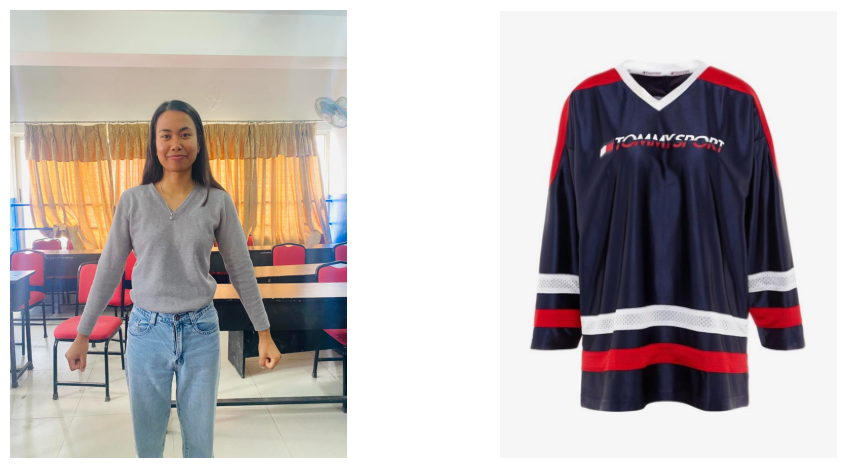

In [ ]:
import matplotlib.pyplot as plt
import cv2

original = cv2.cvtColor(cv2.imread("./static/origin_web.jpg"), cv2.COLOR_BGR2RGB)
cloth = cv2.cvtColor(cv2.imread("./static/cloth_web.jpg"), cv2.COLOR_BGR2RGB)
## Display Images
fig, axes = plt.subplots(nrows=1, ncols=2)
dpi = fig.get_dpi()
fig.set_size_inches(900/ dpi, 448 / dpi)
plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
axes[0].axis('off')
axes[0].imshow(original)
axes[1].axis('off')
axes[1].imshow(cloth)
plt.show()

# 6. RUN CODE
* It will take less than 2 minute
* you can remove background using --background False




In [ ]:
#!python main.py #--background False
!python main.py --background False

Get mask of cloth

Get openpose coordinate using posenet

Generate semantic segmentation using Graphonomy-Master library

Constructing DeepLabv3+ model...
Number of classes: 20
Output stride: 16
Number of Input Channels: 3
load model: ./inference.pth
time used for the multi-scale image inference is :2.3499019210000824

Generate Densepose image using detectron2 library

[04/26 16:05:59 apply_net]: Loading config from detectron2/projects/DensePose/configs/densepose_rcnn_R_50_FPN_s1x.yaml
[04/26 16:05:59 apply_net]: Loading model from https://dl.fbaipublicfiles.com/densepose/densepose_rcnn_R_50_FPN_s1x/165712039/model_final_162be9.pkl
[04/26 16:06:01 apply_net]: Loading data from origin.jpg
/usr/local/lib/python3.9/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-d

# 7. View Results

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


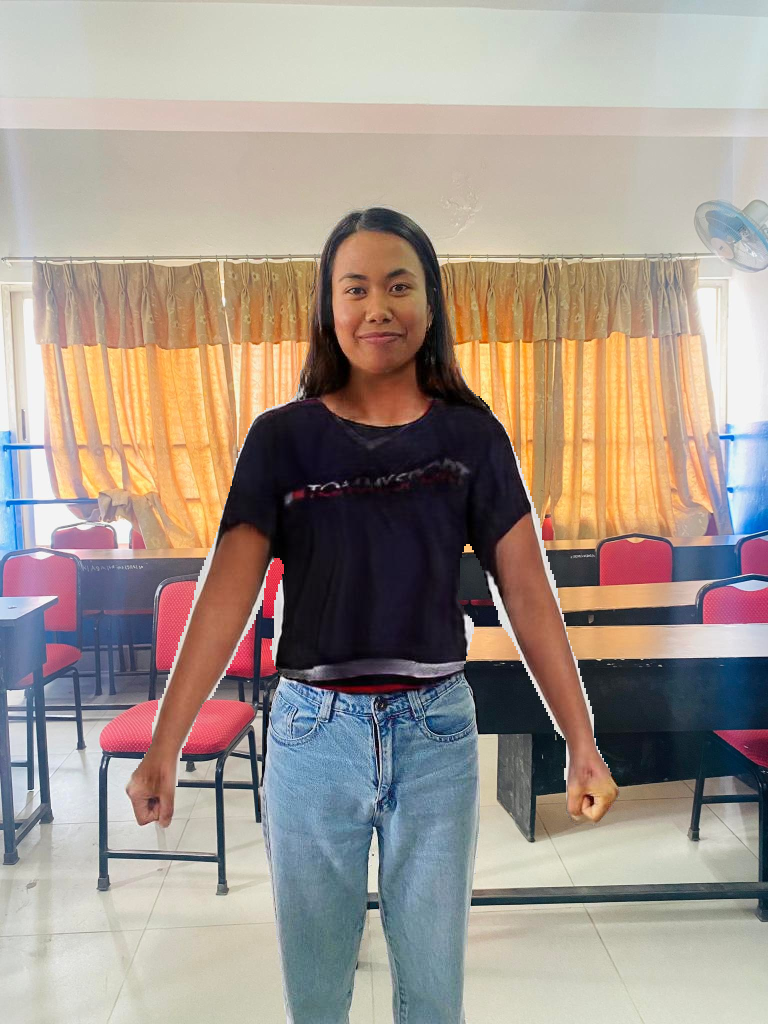

In [ ]:
from PIL import Image
from IPython.display import Image

image1 = Image(filename="./static/finalimg.png")
display(image1)